In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [120]:
dataset=pd.read_csv('../datasets/advertising.csv')
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [121]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [122]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: ylabel='TV'>

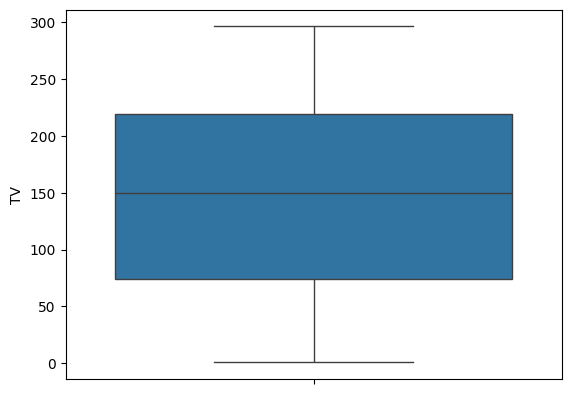

In [123]:
sns.boxplot(dataset['TV'])

<Axes: ylabel='Newspaper'>

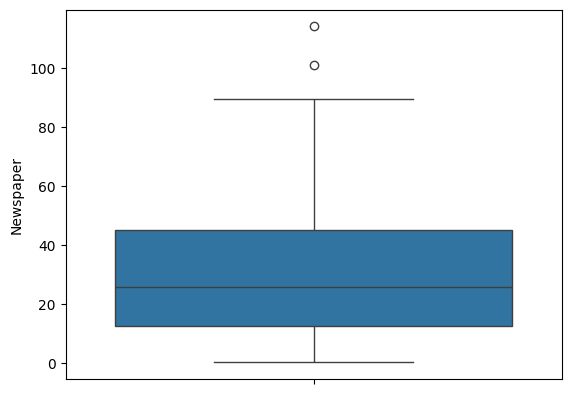

In [124]:
sns.boxplot(dataset['Newspaper'])

<Axes: ylabel='Radio'>

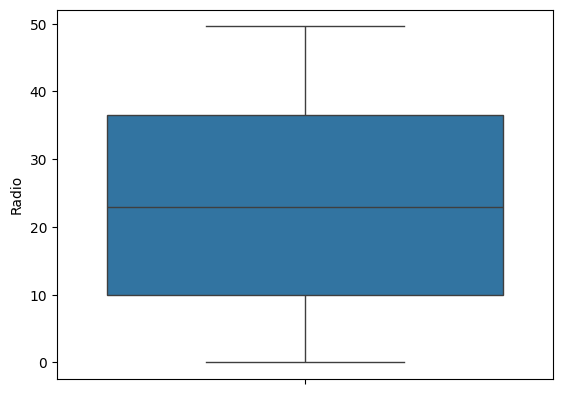

In [125]:
sns.boxplot(dataset['Radio'])

<Axes: ylabel='Sales'>

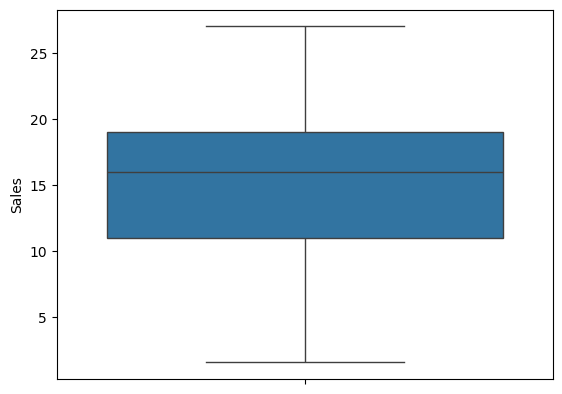

In [126]:
sns.boxplot(dataset['Sales'])

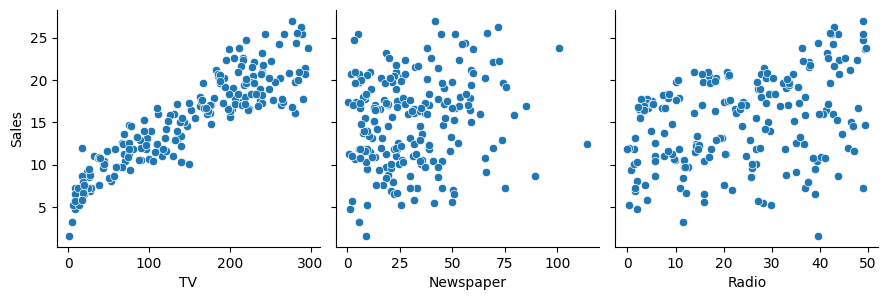

In [127]:
sns.pairplot(dataset,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=3,aspect=1,kind='scatter')

<Axes: >

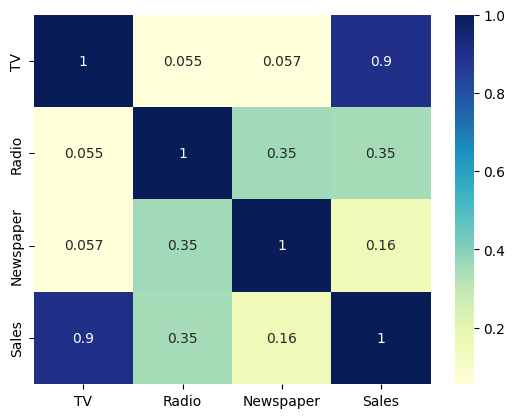

In [128]:
sns.heatmap(dataset.corr(),cmap='YlGnBu',annot=True)

#as we can see from the heatmap TV is most related with sales and then radio and then newspaper

In [129]:
#Now we need to drop Newpaper column for prepare our model

dataset = dataset.drop(['Newspaper'], axis=1)
dataset

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,14.0
197,177.0,9.3,14.8
198,283.6,42.0,25.5


In [146]:
#using linear regression model
x=dataset.drop(['Sales'],axis=1)
y=dataset['Sales']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=80)

In [147]:
X_train.head()

,TV,Radio
179,165.6,10.0
71,109.8,14.3
66,31.5,24.6
125,87.2,11.8
83,68.4,44.5


In [148]:
lr=LinearRegression()


In [149]:
lr.fit(X_train,Y_train)

LinearRegression()

In [150]:
prediction=lr.predict(X_test)
print(prediction)

[21.64526896 13.22796712 20.38014007 19.09851879 23.61727725 17.14789108
  7.93121217  8.94329531 18.38145056 21.30266718 10.33234128 23.85627863
 10.3533407  21.46952199  9.68032559 19.11044479  7.16099244 19.61889842
  9.92769269 20.2572228  18.25261559 18.93519773 14.03997633 12.49661548
 14.27841687 12.33597835 18.40936749 19.64826199 13.16132267 12.80767911
 16.70678332 16.76459183 11.3622978  10.47481133 20.76712149 12.32564112
 21.01628357 10.50868035  9.30960068 21.68328565 23.8322782   7.06772928
 19.09262921 24.04033196 21.38833325 21.04046054 15.70027111 10.59077985
 21.55563017 18.29201799 18.75947887 22.04797571 12.56084474 19.44574475
 18.93063449  9.26758001  9.74626236 13.94721151 10.72435774 20.97337554]


In [151]:
lr.score(X_train,Y_train)

0.9162609550395822

In [152]:
print(r2_score(Y_test,prediction))

0.8661924642323375


In [153]:
print(mean_squared_error(Y_test,prediction))

3.7370511964391473
